# Preparation

## Load bibs

In [1]:
from my_functions.functions_tsne_analysis import DataPreparation 
from my_functions.functions_tsne_analysis import DimensionalityReduction
from my_functions.functions_tsne_analysis import Clustering
from my_functions.functions_tsne_analysis import Vizualization

/home/lbader/.conda/envs/py310-dm-tf-cloned/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.0' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
2025-03-22 06:26:33.671971: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-22 06:26:33.675432: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-22 06:26:33.687420: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-22 06:26:33.707010: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered

# Data Preparation 

## Load data

### Shape files

In [2]:
# Beispielhafte Nutzung
state_path='data/original_data/pkl/state.pickle'
county_path='data/original_data/pkl/county.pickle'

(
    state_shape,
    county_shape,
    filtered_state_shape_north_america,
    filtered_state_shape_alaska,
    filtered_county_shape_north_america,
    filtered_county_shape_alaska
) = DataPreparation.prepare_us_geometries_with_original_names(state_path, county_path)


### County data

In [3]:
import pandas as pd
county_master = pd.read_pickle('data/original_data/pkl/county_information.pkl')
county_master.head()

statefp countyfp  countyns   FIPS county_name county_name_long state_iso2  \
0      39      063  01074044  39063     Hancock   Hancock County         OH   
1      51      179  01480173  51179    Stafford  Stafford County         VA   
2      31      181  00835912  31181     Webster   Webster County         NE   
3      48      127  01383849  48127      Dimmit    Dimmit County         TX   
4      19      031  00465205  19031       Cedar     Cedar County         IA   

  lsad classfp  mtfcc  ... metdivfp funcstat       aland    awater  \
0   06      H1  G4020  ...     None        A  1376125660   6020647   
1   06      H1  G4020  ...    47894        A   697237202  28088011   
2   06      H1  G4020  ...     None        A  1489017962    337241   
3   06      H1  G4020  ...     None        A  3441795367  14576535   
4   06      H1  G4020  ...     None        A  1500798712   6385832   

      latitude     longitude state_name GEOID         Region Population_2023  
0  +41.0004711  -083.6660335       Ohio    39  North-Eastern         74704.0  
1  +38.4132608  -077.4513342   Virginia    51          Other        165428.0  
2  +40.1806461  -098.4985897   Nebraska    31          Other          3351.0  
3  +28.4235871  -099.7658713      Texas    48   The Southern          8257.0  
4  +41.7723600  -091.1326105       Iowa    19          Other         18302.0  

[5 rows x 22 columns]

### US industry regions

In [4]:
industry_regions, multi_region_states = DataPreparation.assign_industry_regions(filtered_state_shape_north_america)

print("States assigned to multiple regions:", multi_region_states)

States assigned to multiple regions: []


In [5]:
unique_missing, us_territories = DataPreparation.find_missing_us_territories(county_master, industry_regions)

print("Missing states/territories:")
print(unique_missing)

Missing states/territories:
     statefp                state_name
18        72               Puerto Rico
56        60            American Samoa
202       15                    Hawaii
618       66                      Guam
879       78       U.S. Virgin Islands
1903      69  Northern Mariana Islands


### Feature Dataframe

In [6]:
df_original= DataPreparation.load_and_filter_feature_dataframe(
    'data/processed_data/pkl/plan_b_df.pkl',
    us_territories
)

df_original.head()

Unique FIPS before: 3233
Unique FIPS after: 3137


FIPS  total_emp_occu_51-9022  total_emp_occu_51-4121  \
0  39063                7.139367              112.109221   
1  51179                0.701612               38.190271   
2  31181                0.000000                0.383612   
3  48127                0.000000               22.729756   
4  19031                0.063310               22.119571   

   total_emp_occu_49-9041  total_emp_occu_49-9071  total_emp_occu_51-4033  \
0              163.931470              606.245802               84.212192   
1               79.435461              421.674025                0.216403   
2                1.766290                1.938639                0.005345   
3               44.719147               23.669696                0.009005   
4               22.357401               26.755142                0.766769   

   total_emp_occu_51-4035  total_emp_occu_47-2211  total_emp_occu_51-2041  \
0               14.770825               14.243830                5.062925   
1                0.383702               37.487879                2.604025   
2                0.078293                0.000000                0.030081   
3                0.000000                0.034805                0.086910   
4                0.506321                5.864089                3.488307   

   total_emp_naics_3315  total_emp_naics_3364  total_emp_naics_3366  \
0                   0.0                   0.0                   0.0   
1                   0.0                   0.0                   0.0   
2                   0.0                   0.0                   0.0   
3                   0.0                   0.0                   0.0   
4                   0.0                   0.0                   0.0   

   total_emp_naics_3335  total_emp_naics_3320A1  total_emp_naics_3320A2  \
0                 758.0                     0.0                    65.0   
1                   0.0                     0.0                    12.0   
2                   0.0                     0.0                     0.0   
3                   0.0                     0.0                     0.0   
4                   0.0                     0.0                    52.0   

   total_emp_naics_3327  total_emp_naics_3312  total_emp_naics_3314  \
0                 206.0                   0.0                   0.0   
1                   0.0                   0.0                   0.0   
2                   0.0                   0.0                   0.0   
3                   0.0                   0.0                   0.0   
4                   0.0                   0.0                   0.0   

   total_emp_naics_Automotive  
0                         0.0  
1                         0.0  
2                         0.0  
3                         0.0  
4                         0.0

# Scaling

In [7]:
df_scaled_log,df_scaled_features_log, df_original_features = DataPreparation.apply_log10_scaling(df_original)

In [8]:
feature_id_dict = {feature: "F" + str(i+1) for i, feature in enumerate(df_original_features.columns)}
feature_id_dict

{'total_emp_occu_51-9022': 'F1',
 'total_emp_occu_51-4121': 'F2',
 'total_emp_occu_49-9041': 'F3',
 'total_emp_occu_49-9071': 'F4',
 'total_emp_occu_51-4033': 'F5',
 'total_emp_occu_51-4035': 'F6',
 'total_emp_occu_47-2211': 'F7',
 'total_emp_occu_51-2041': 'F8',
 'total_emp_naics_3315': 'F9',
 'total_emp_naics_3364': 'F10',
 'total_emp_naics_3366': 'F11',
 'total_emp_naics_3335': 'F12',
 'total_emp_naics_3320A1': 'F13',
 'total_emp_naics_3320A2': 'F14',
 'total_emp_naics_3327': 'F15',
 'total_emp_naics_3312': 'F16',
 'total_emp_naics_3314': 'F17',
 'total_emp_naics_Automotive': 'F18'}

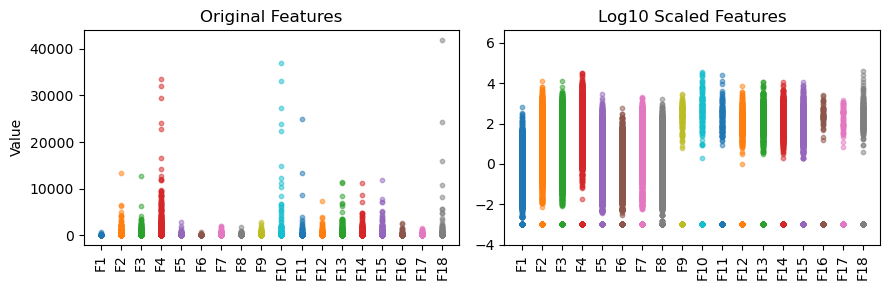

In [9]:
DataPreparation.plot_feature_distributions_before_after_log(df_original, df_scaled_log)

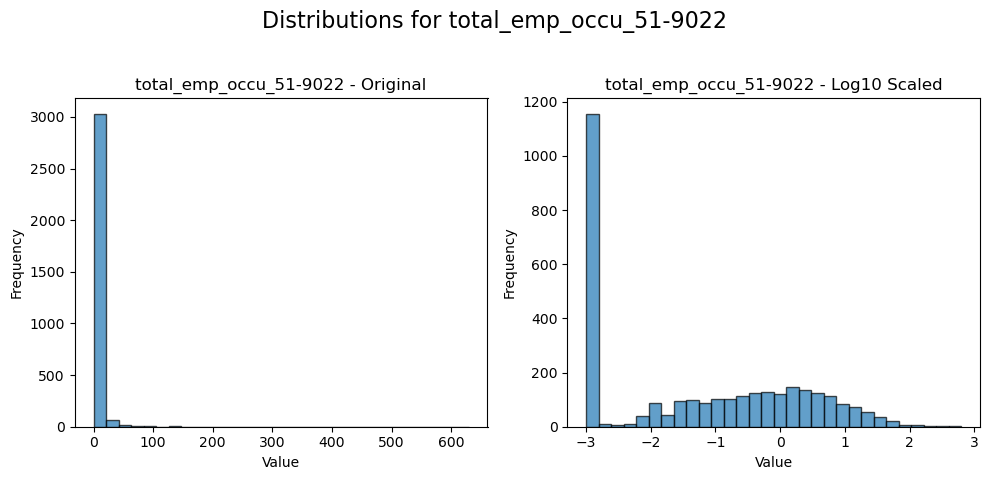

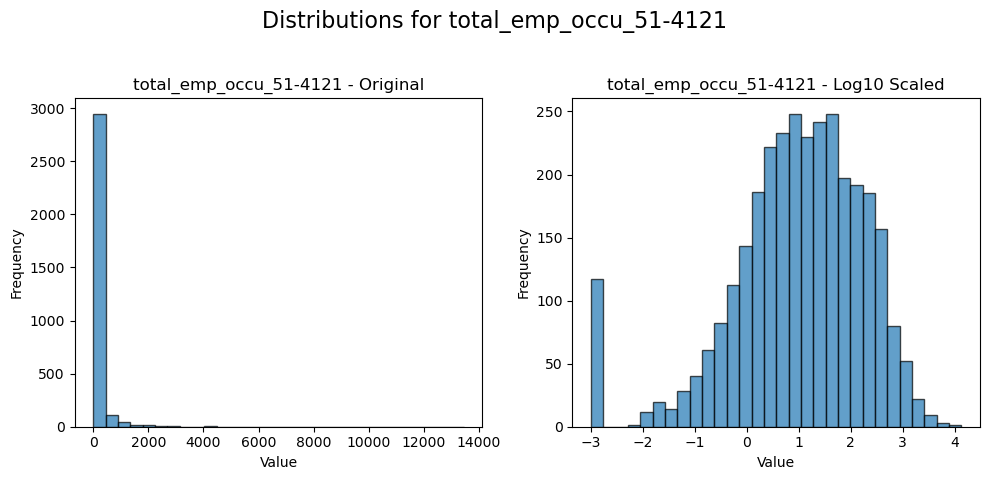

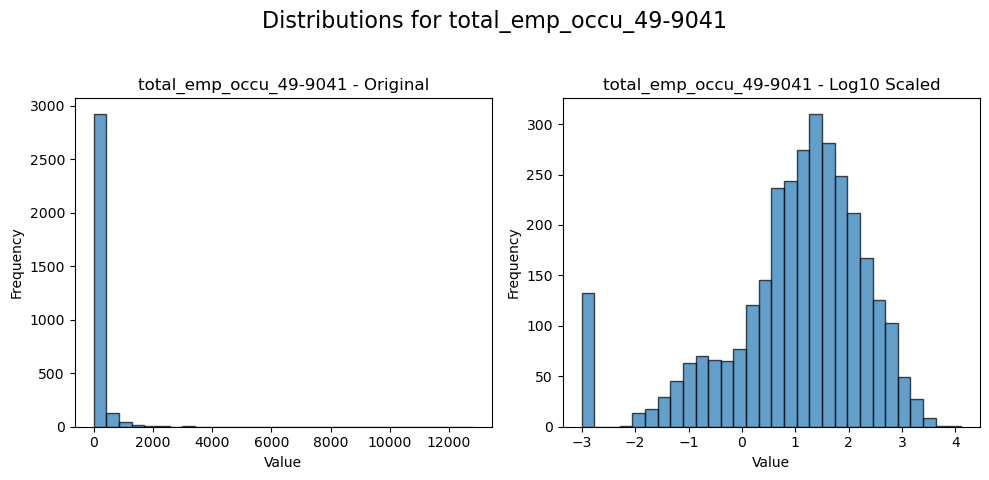

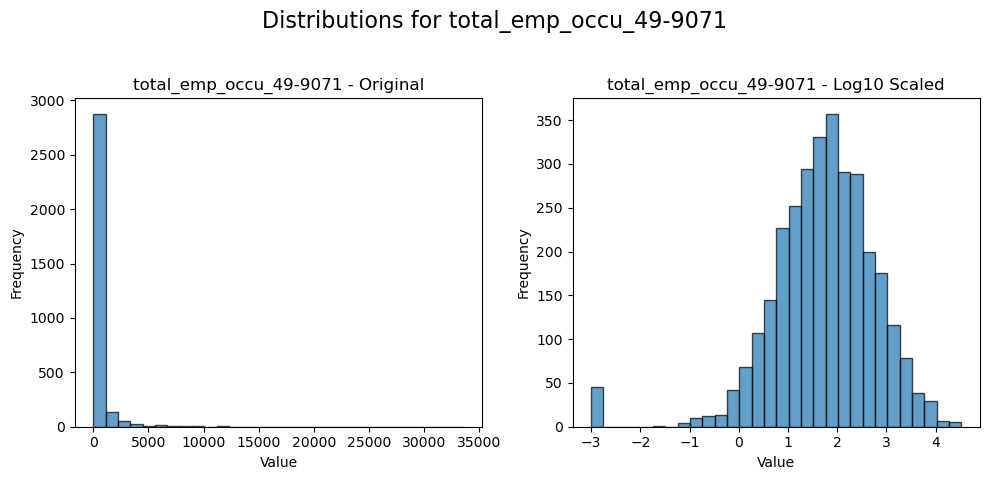

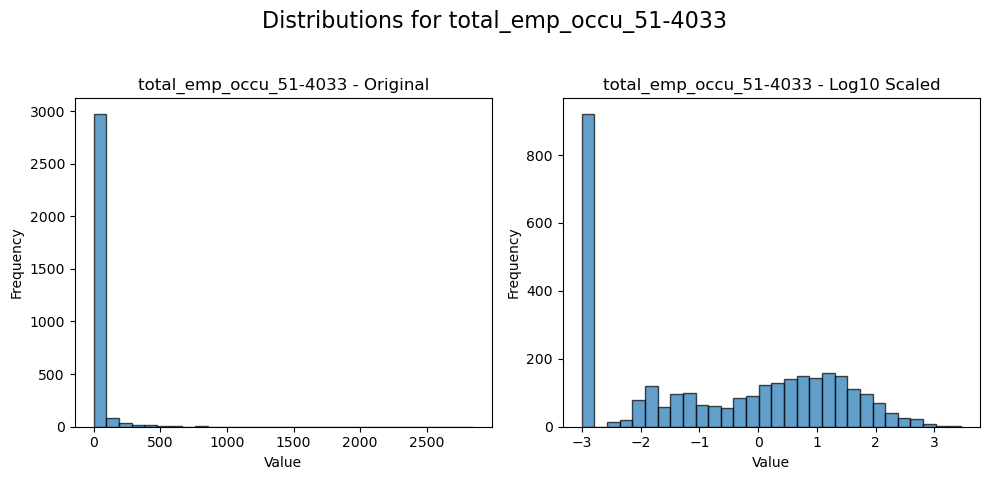

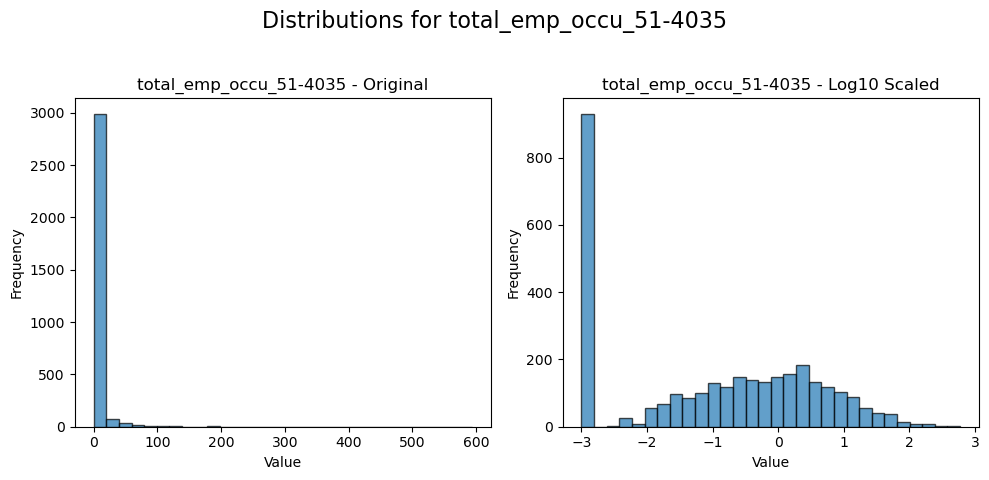

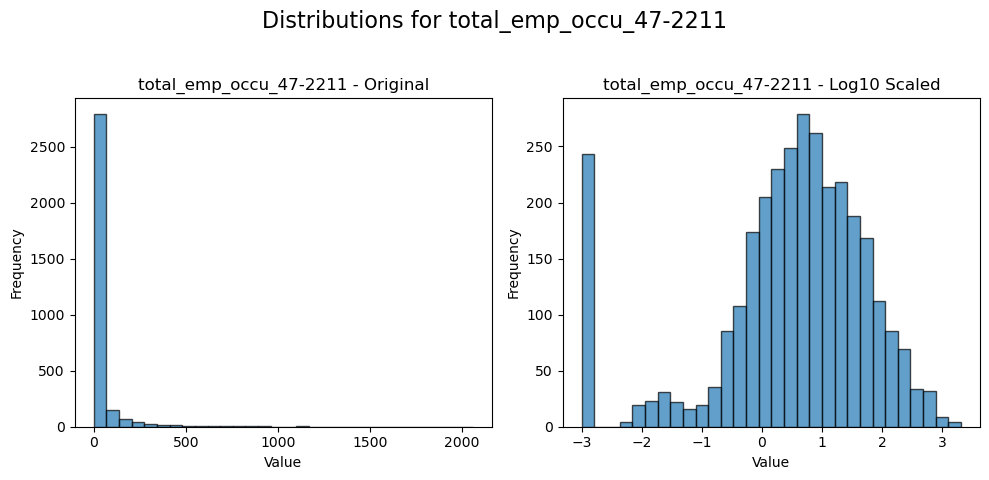

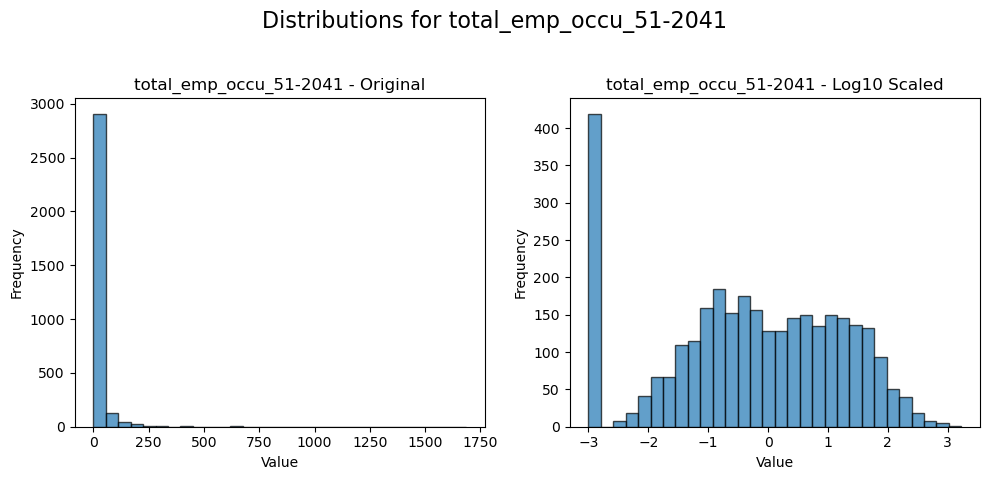

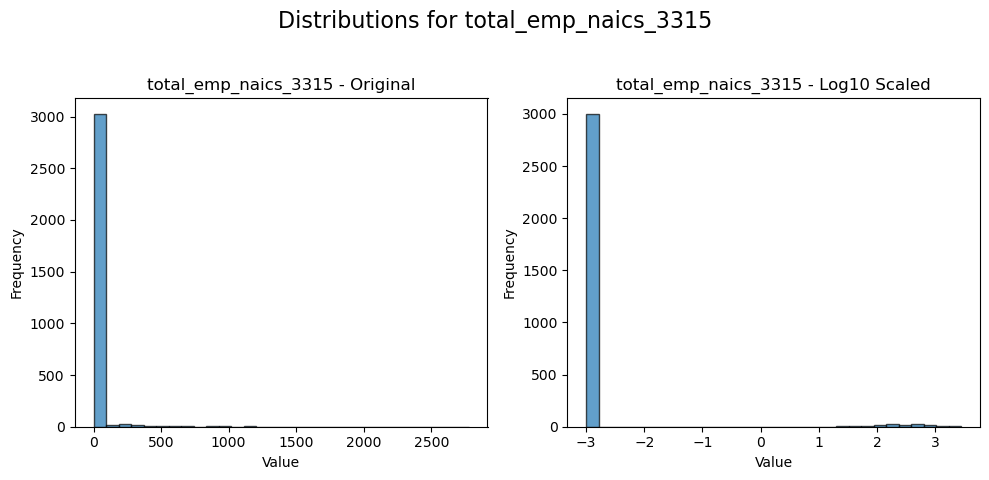

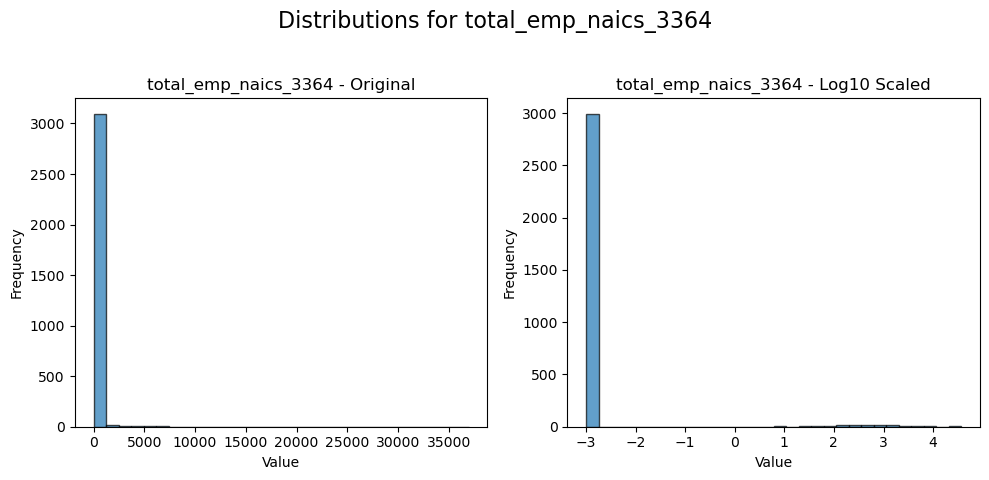

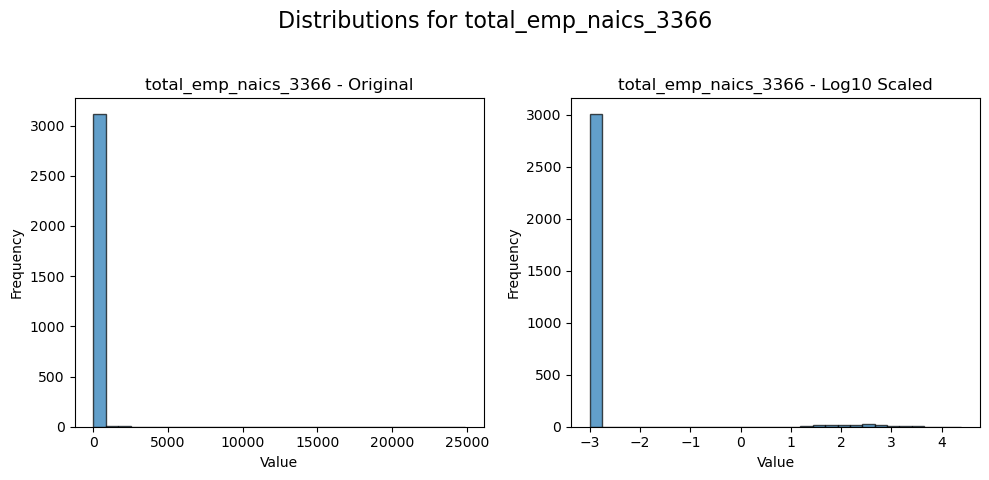

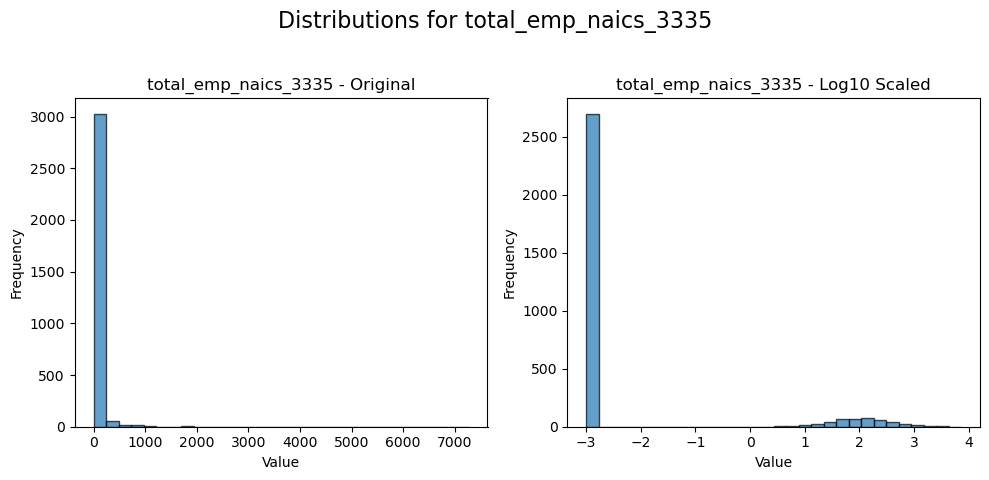

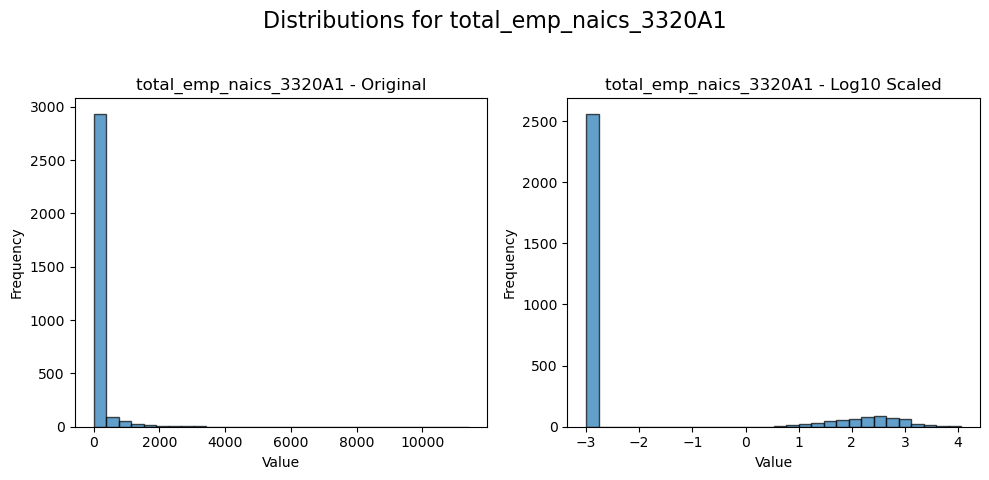

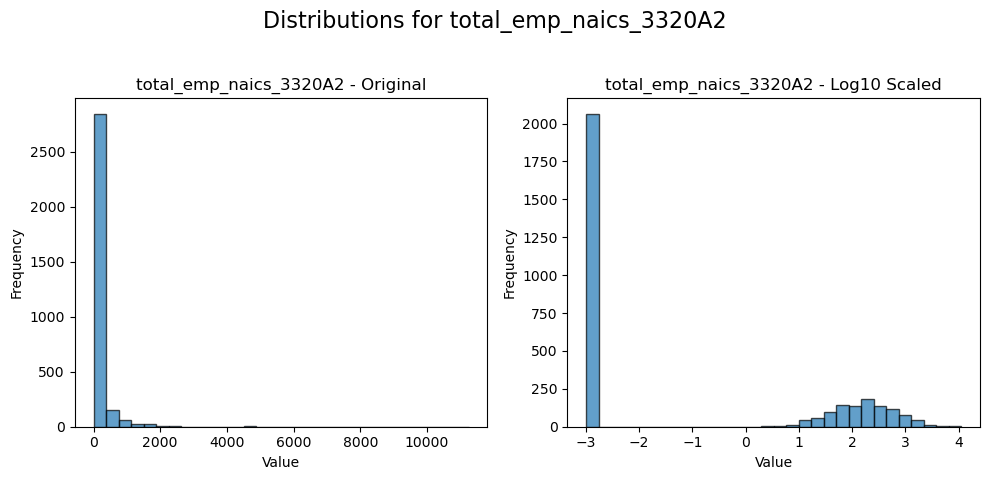

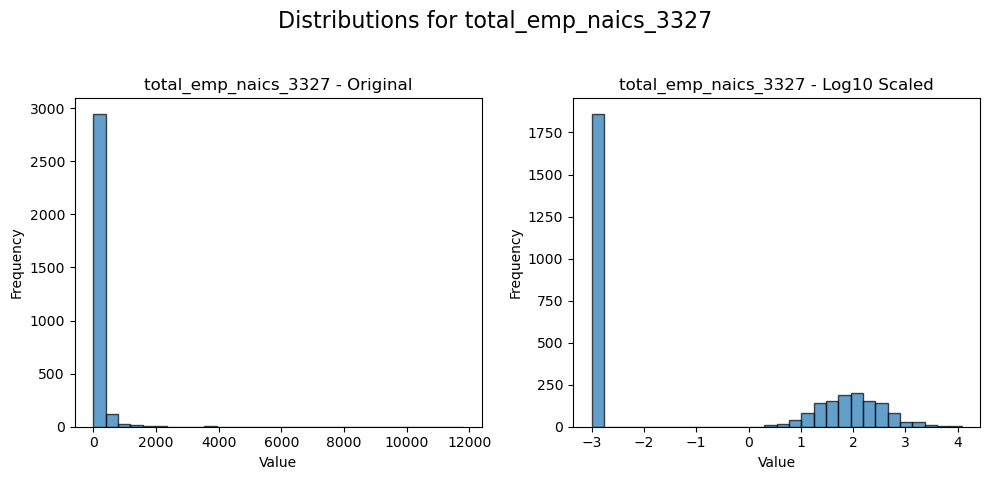

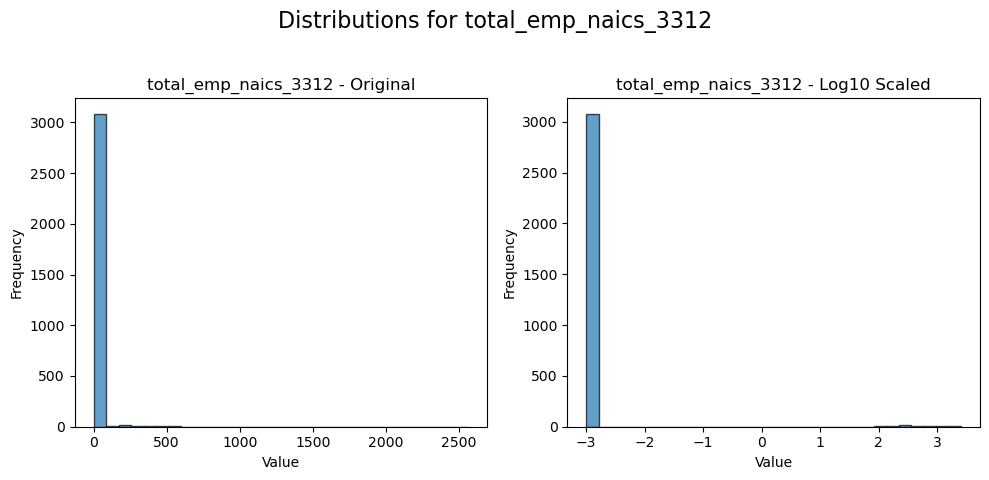

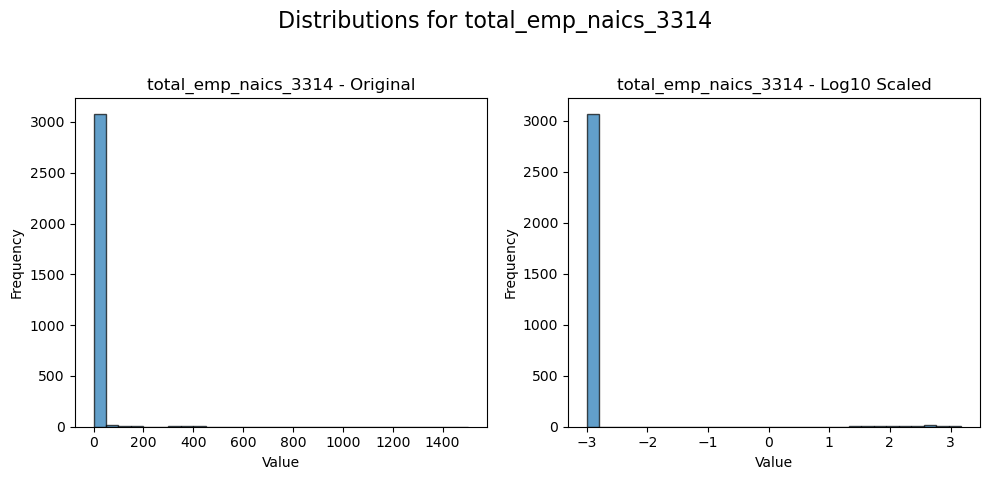

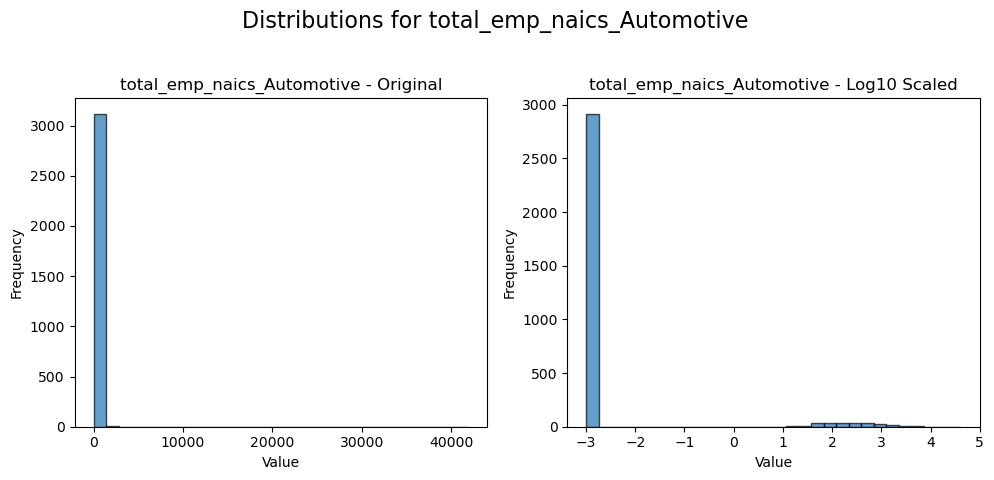

In [10]:
DataPreparation.plot_histograms(df_original, df_scaled_log)

In [11]:
# Optional: Descriptions of your features
descriptions = [
    "SOC 51-9022, Grinding, Polishing by Hand",
    "SOC 51-4121, Welders, Cutters, Solderers",
    "SOC 49-9041, Industrial Machinery Mechanics",
    "SOC 49-9071, Maintenance and Repair Workers",
    "SOC 51-4033, Grinding, Lapping, Polishing",
    "SOC 51-4035, Milling and Planing Machine Setters",
    "SOC 47-2211, Sheet Metal Workers",
    "SOC 51-2041, Structural Metal Fabricators",
    "NAICS 3315, Foundries", 
    "NAICS 3364, Aerospace",
    "NAICS 3366, Shipbuilding",
    "NAICS 3335, Metalworking Machines Manufacturing", 
    "NAICS 3320A1, Steel forming", 
    "NAICS 3320A2, Structural Metals Manufacturing",
    "NAICS 3327, Machine Shops", 
    "NAICS 3312, Steel Product Manufacturing", 
    "NAICS 3314, Nonferrous Metal Production",
    "NAICS 3361/3362, Automotive"
]

# Create summary
summary_df, styled_summary = DataPreparation.create_feature_summary_table(df_original, descriptions=descriptions)

# Display styled table (e.g., in Jupyter Notebook)
styled_summary


# Dimensionality Reduction

In [12]:
df_scaled = df_scaled_log
df_scaled_features = df_scaled_features_log

### TSNE

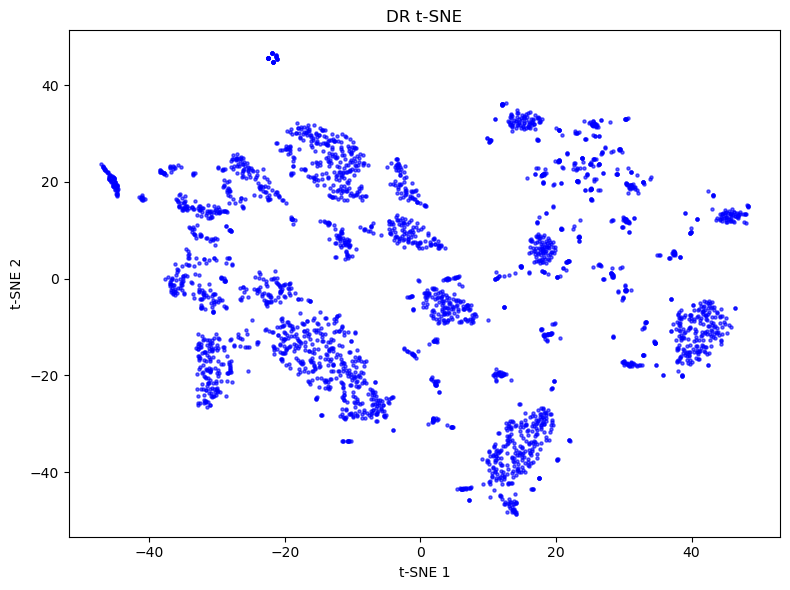

In [13]:
X_tsne = DimensionalityReduction.plot_tsne_2d(df_scaled_features)

### UMAP

/home/lbader/.conda/envs/py310-dm-tf-cloned/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


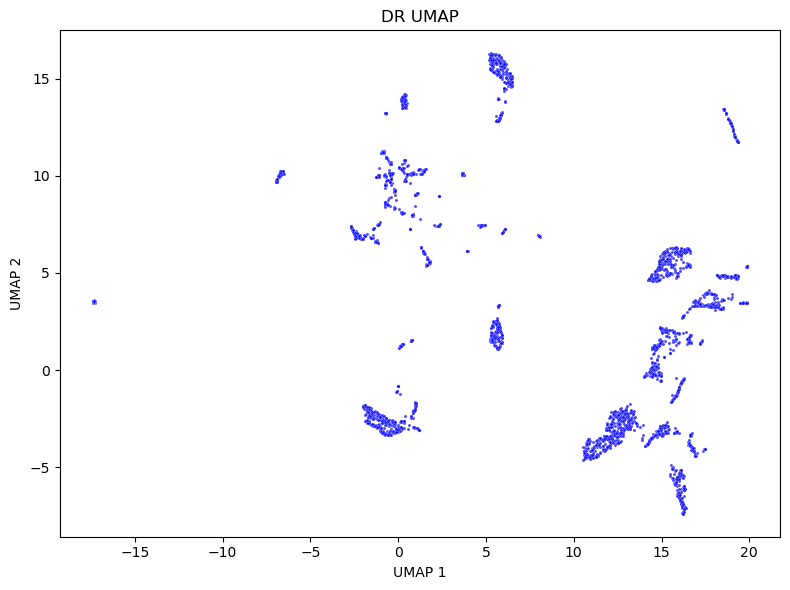

In [14]:
embedding = DimensionalityReduction.plot_umap_2d(df_scaled_features)

## PCA

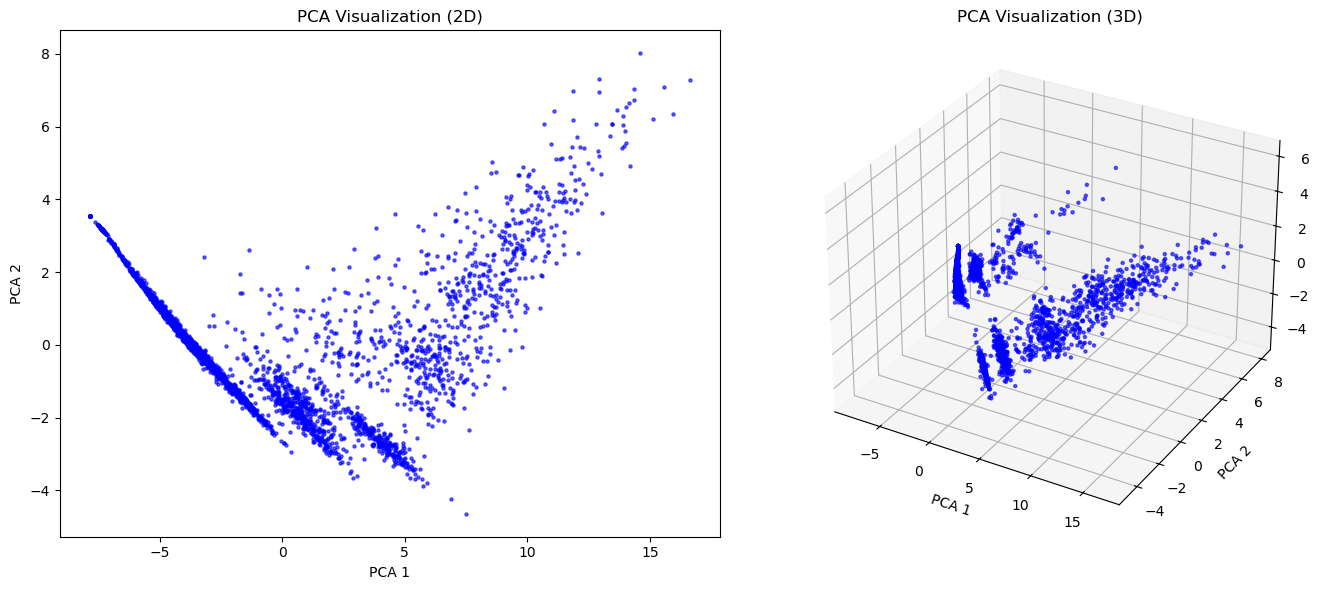

In [15]:
X_pca_2d, X_pca_3d = DimensionalityReduction.plot_pca_2d_3d(df_scaled_log)

# Clustering

## HDBScan with full feature space

In [16]:
param_grid = {
    'min_cluster_size': range(30, 50, 2),
    'min_samples': range(1, 10)
}

# Optional: true_labels = df_scaled['true_label']

results_df = Clustering.run_hdbscan_gridsearch(
    df_scaled=df_scaled_log,
    param_grid=param_grid,
    true_labels=None,  # oder true_labels, falls vorhanden
    save_path='data/processed_data/pkl/hdbscan_results_df.pickle'
)
results_df

min_cluster_size: 100%|██████████| 10/10 [01:05<00:00,  6.57s/it]


min_cluster_size  min_samples  unique_clusters  silhouette  \
0                 30            1               23    0.073293   
1                 30            2               14    0.228131   
2                 30            3               14    0.218701   
3                 30            4               14    0.211599   
4                 30            5               13    0.192853   
..               ...          ...              ...         ...   
85                48            5                8    0.310709   
86                48            6                8    0.310363   
87                48            7                8    0.309971   
88                48            8                8    0.309635   
89                48            9                8    0.309635   

    calinski_harabasz  davies_bouldin  negative_silhouette_count  noise_ratio  \
0          161.799152        1.500971                       1140     0.308894   
1          327.693843        1.575018                        803     0.190628   
2          310.554477        1.556946                        838     0.203698   
3          299.676549        1.542089                        860     0.214536   
4          288.807584        1.527970                        934     0.241951   
..                ...             ...                        ...          ...   
85         570.120616        1.755510                        620     0.178196   
86         568.187165        1.755536                        622     0.178833   
87         566.587633        1.753617                        626     0.179790   
88         564.958183        1.738348                        627     0.182021   
89         564.958183        1.738348                        627     0.182021   

    hdbscan_persistence  avg_cluster_probability  jaccard  
0              1.000000                 0.597499       -1  
1              1.000000                 0.737086       -1  
2              1.000000                 0.720286       -1  
3              1.000000                 0.707087       -1  
4              1.000000                 0.679941       -1  
..                  ...                      ...      ...  
85             0.103622                 0.745157       -1  
86             0.105056                 0.744515       -1  
87             0.105823                 0.741450       -1  
88             0.109722                 0.737428       -1  
89             0.111080                 0.742666       -1  

[90 rows x 11 columns]

In [17]:
best_hdbscan_full_space = Clustering.select_best_hdbscan_result(
    result_path='data/processed_data/pkl/hdbscan_results_df.pickle',
    noise_threshold=0.1,
    min_clusters=2,
    min_persistence=0.5
)

print("Best HDBSCAN Full Space config:\n", best_hdbscan_full_space)


Best HDBSCAN Full Space config:
 {'min_cluster_size': 46, 'min_samples': 1, 'unique_clusters': 9, 'silhouette': 0.3188144984474714, 'calinski_harabasz': 535.3915327822342, 'davies_bouldin': 1.7832145709172647, 'negative_silhouette_count': 578, 'noise_ratio': 0.16034427797258527, 'hdbscan_persistence': 0.08346740004582781, 'avg_cluster_probability': 0.7732910608453137, 'jaccard': -1}


## HDBScan on t-SNE

In [18]:
param_grid = {
    'min_cluster_size': range(30, 50, 2),
    'min_samples': range(1, 10)
}

hdbscan_results_tsne_df = Clustering.run_hdbscan_gridsearch_tsne(
    tsne_embedding=X_tsne,
    param_grid=param_grid,
    save_path='data/processed_data/pkl/hdbscan_results_tsne_df.pickle'
)


min_cluster_size: 100%|██████████| 10/10 [00:23<00:00,  2.37s/it]


In [19]:
best_hdbscan_tsne = Clustering.select_best_hdbscan_reduced_result(
    result_path='data/processed_data/pkl/hdbscan_results_tsne_df.pickle',
    noise_threshold=0.1,
    min_clusters=2,
    min_persistence=0.5
)

print("Best HDBSCAN (reduced space):")
print(best_hdbscan_tsne)


Best HDBSCAN (reduced space):
{'min_cluster_size': 44, 'min_samples': 5, 'unique_clusters': 21, 'silhouette': 0.45343217253685, 'calinski_harabasz': 1547.2761964343747, 'davies_bouldin': 1.6299108922054406, 'negative_silhouette_count': 320, 'noise_ratio': 0.05929231750079694, 'hdbscan_persistence': 0.29936666663203676, 'avg_cluster_probability': 0.8043757211146374}


## DBScan on t-SNE components

In [20]:
import numpy as np
param_grid = {
    'eps': np.arange(2, 5.5, 0.5),
    'min_samples': range(20, 46, 5)
}

dbscan_results_df = Clustering.run_dbscan_gridsearch_tsne(
    tsne_data=X_tsne,
    param_grid=param_grid,
    save_path='data/processed_data/pkl/dbscan_results_df.pickle'
)

eps: 100%|██████████| 7/7 [00:14<00:00,  2.03s/it]        


In [21]:
best_dbscan_result = Clustering.select_best_dbscan_result(
    result_path='data/processed_data/pkl/dbscan_results_df.pickle',
    min_clusters=2,
    noise_threshold=0.2,
    strict_noise_preference=0.05
)

print("Best DBSCAN result:\n", best_dbscan_result)


Best DBSCAN result:
 {'eps': 4.0, 'min_samples': 35, 'unique_clusters': 14, 'silhouette': 0.40240052342414856, 'silhouette_avg': 0.40240052342414856, 'calinski_harabasz': 1523.4918162370711, 'davies_bouldin': 1.614979779833144, 'negative_silhouette_count': 389, 'noise_ratio': 0.08288173414089894}


## Vizualization clustering methods

In [22]:
df_hdbscan_full, df_dbscan_tsne, df_hdbscan_tsne = Clustering.apply_and_color_clusters(
    df_scaled=df_scaled,
    X_tsne=X_tsne,
    hdbscan_full_space_best_result=best_hdbscan_full_space,
    hdbscan_reduced_space_best_result=best_hdbscan_tsne,
    dbscan_best_params=best_dbscan_result  # Oder dynamisch
)


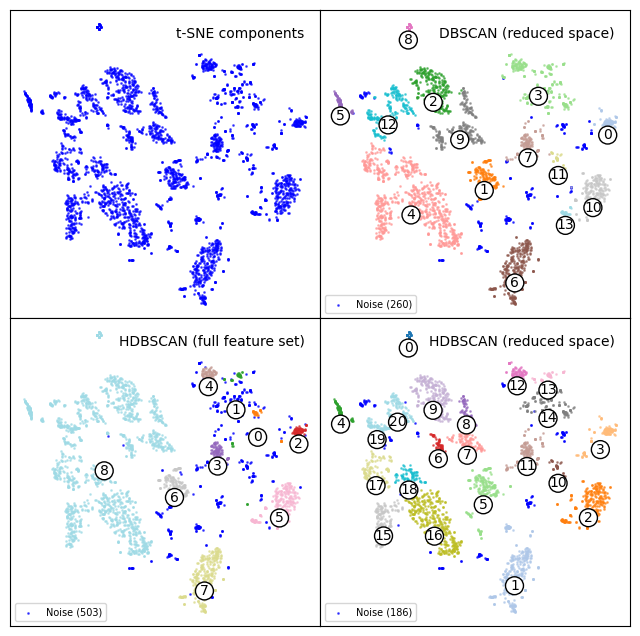

In [23]:
Clustering.plot_cluster_comparison_tsne(
    X_tsne=X_tsne,
    df_dbscan_tsne=df_dbscan_tsne,
    df_hdbscan_tsne=df_hdbscan_tsne,
    df_hdbscan_full=df_hdbscan_full
)


## Metrics

In [24]:
labels_dict = {
    'HDBSCAN (full feature set)': df_hdbscan_full['cluster_id'].values,
    'HDBSCAN (t-SNE)': df_hdbscan_tsne['cluster_id'].values,
    'DBSCAN (t-SNE)': df_dbscan_tsne['cluster_id'].values
}

data_dict = {
    'HDBSCAN (full feature set)': df_scaled.iloc[:, 1:],  # Ohne ID-Spalte und ggf. Zielspalten
    'HDBSCAN (t-SNE)': X_tsne,
    'DBSCAN (t-SNE)': X_tsne
}

# Jetzt evaluieren:
df_metrics, pairwise_metrics = Clustering.evaluate_clusterings(labels_dict, data_dict)

# Anzeigen:
print("Internal clustering metrics:")
display(df_metrics)

print("\nPairwise comparison (ARI/NMI):")
display(pairwise_metrics)


Internal clustering metrics:


num_clusters  \
method                                     
HDBSCAN (full feature set)             9   
HDBSCAN (t-SNE)                       21   
DBSCAN (t-SNE)                        14   

                                                                cluster_sizes  \
method                                                                          
HDBSCAN (full feature set)          [1611, 293, 242, 154, 97, 70, 62, 59, 46]   
HDBSCAN (t-SNE)             [380, 340, 263, 248, 205, 171, 161, 147, 131, ...   
DBSCAN (t-SNE)              [756, 323, 304, 250, 231, 220, 220, 168, 142, ...   

                            noise_fraction  silhouette  
method                                                  
HDBSCAN (full feature set)        0.160344    0.318814  
HDBSCAN (t-SNE)                   0.059292    0.453432  
DBSCAN (t-SNE)                    0.082882    0.402401


Pairwise comparison (ARI/NMI):


ARI       NMI
Comparison                                                       
HDBSCAN (full feature set) vs HDBSCAN (t-SNE)  0.203591  0.587956
HDBSCAN (full feature set) vs DBSCAN (t-SNE)   0.372138  0.661283
HDBSCAN (t-SNE) vs DBSCAN (t-SNE)              0.603734  0.830466

# Vizualizations

## Feature values in t-SNE plot

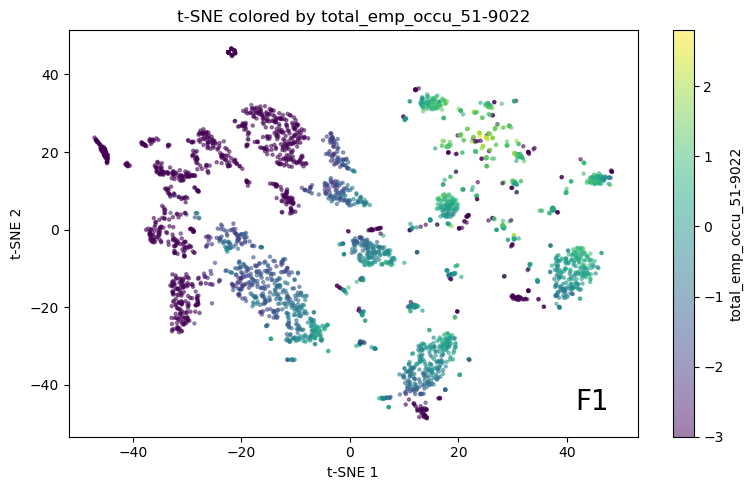

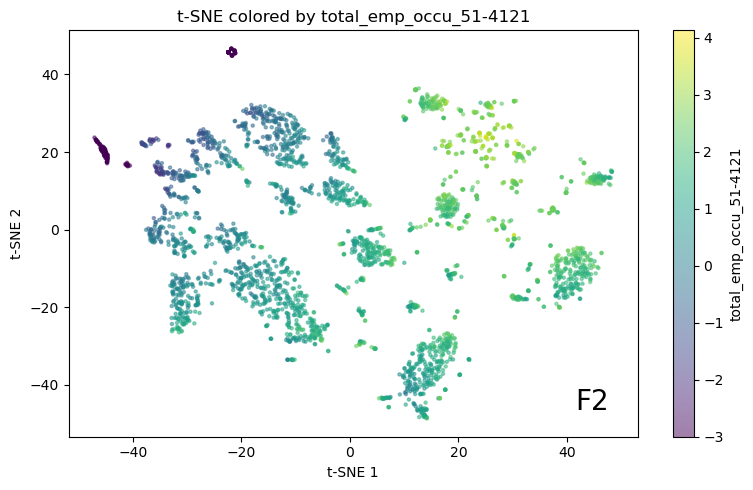

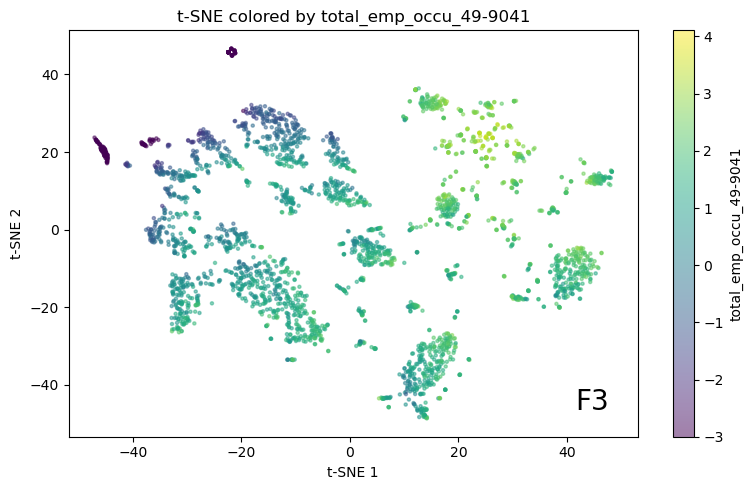

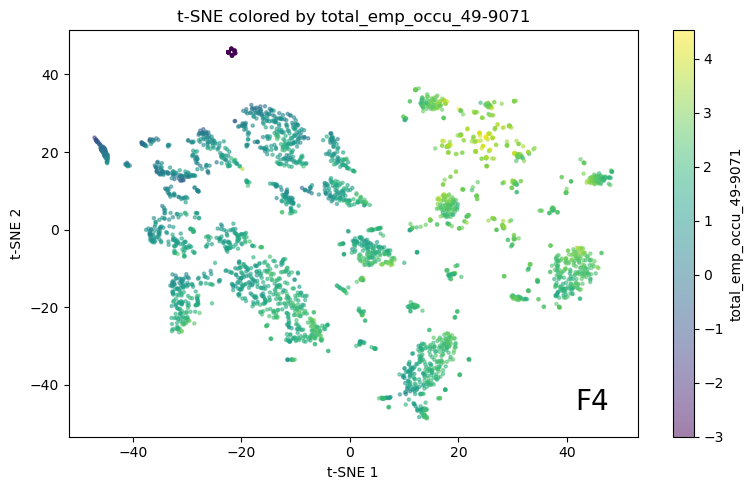

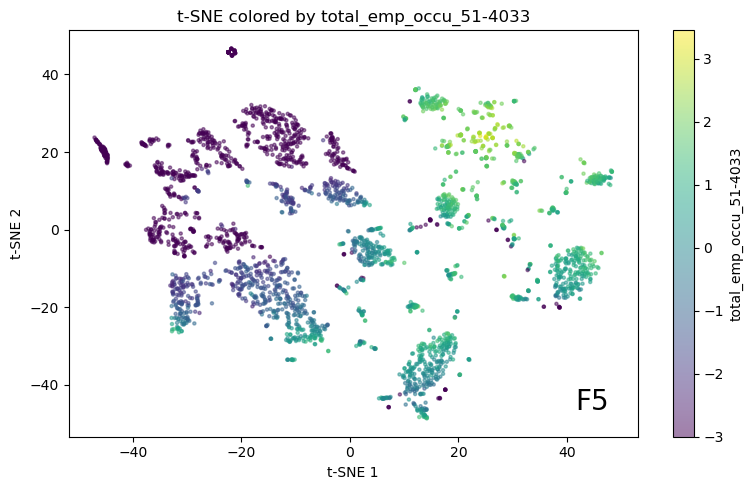

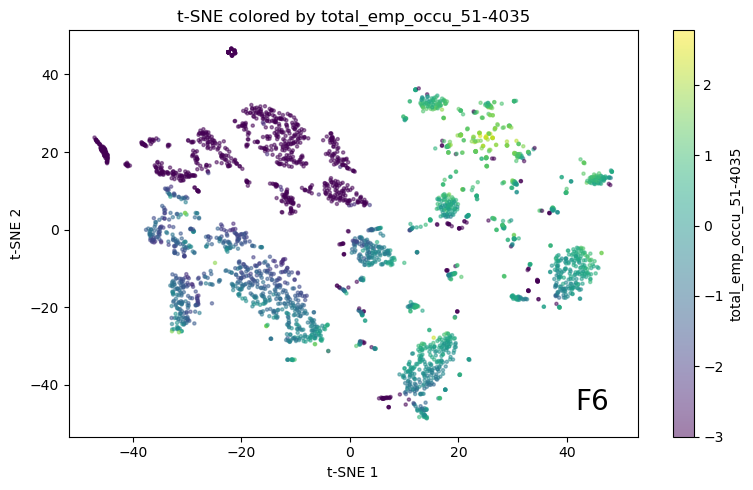

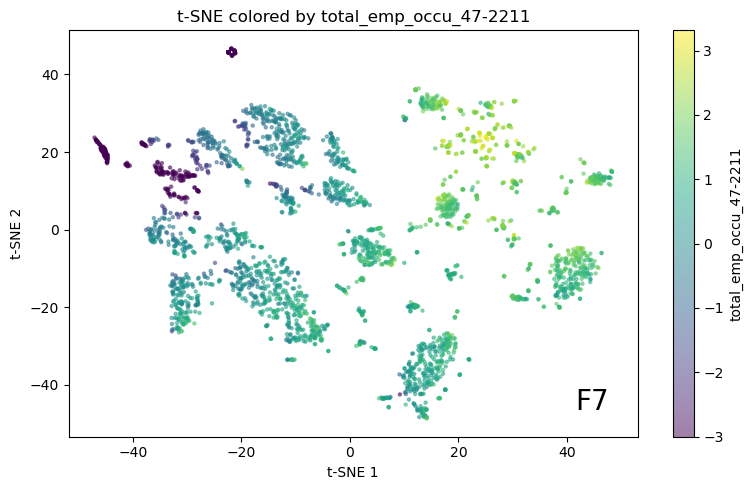

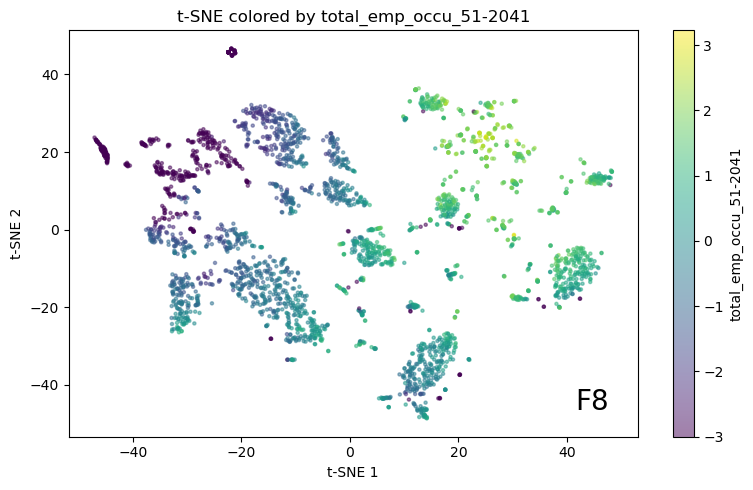

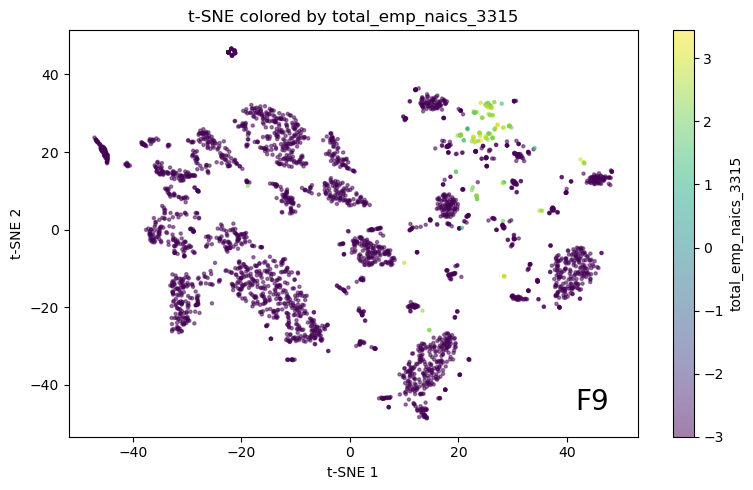

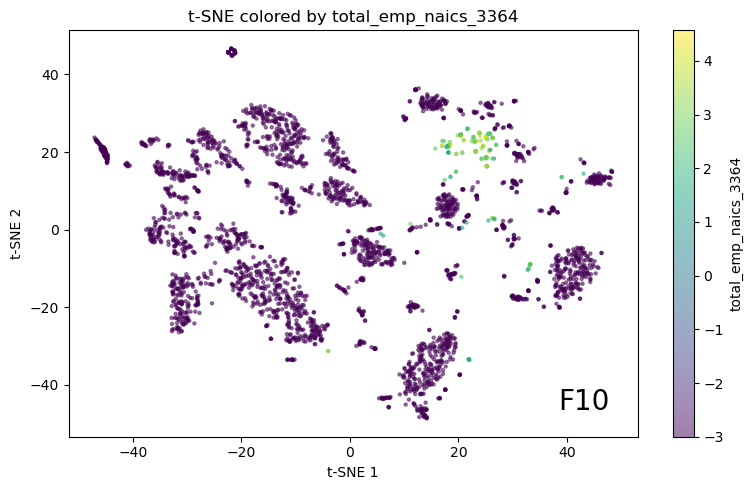

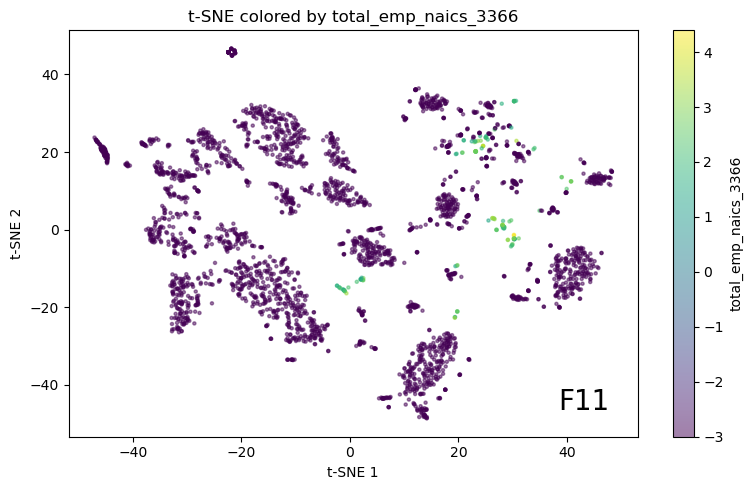

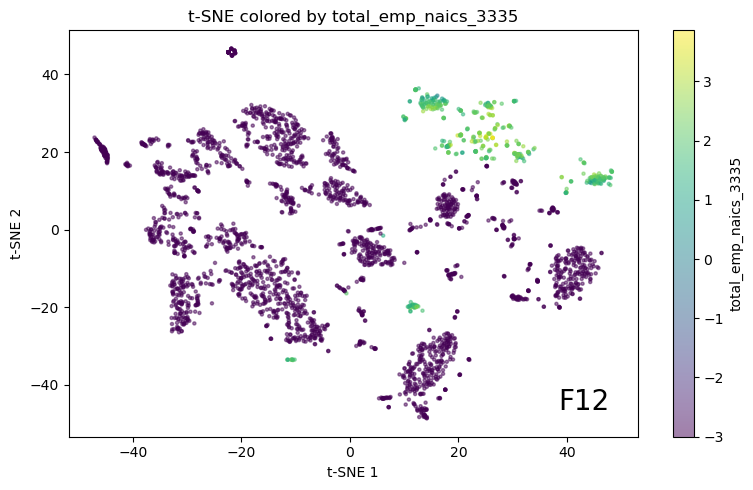

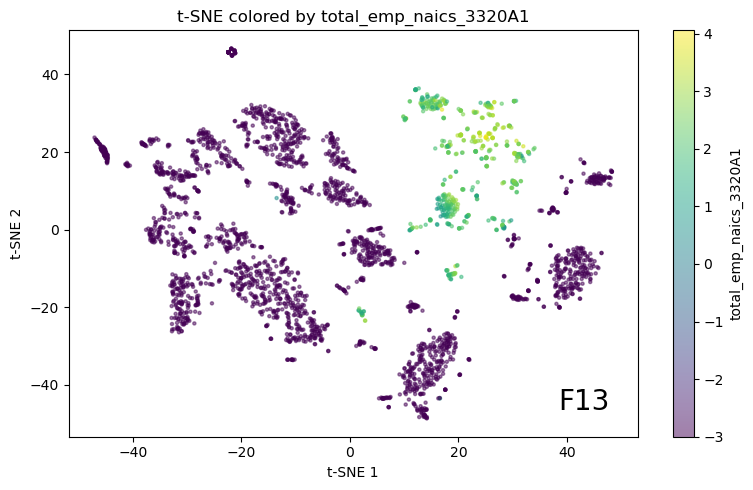

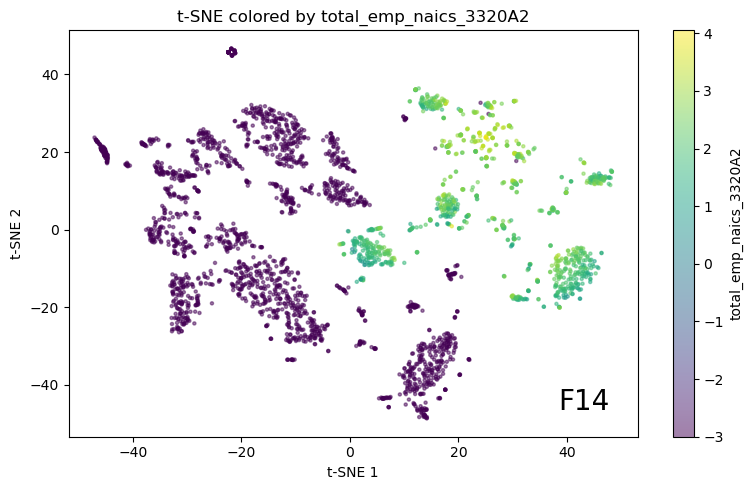

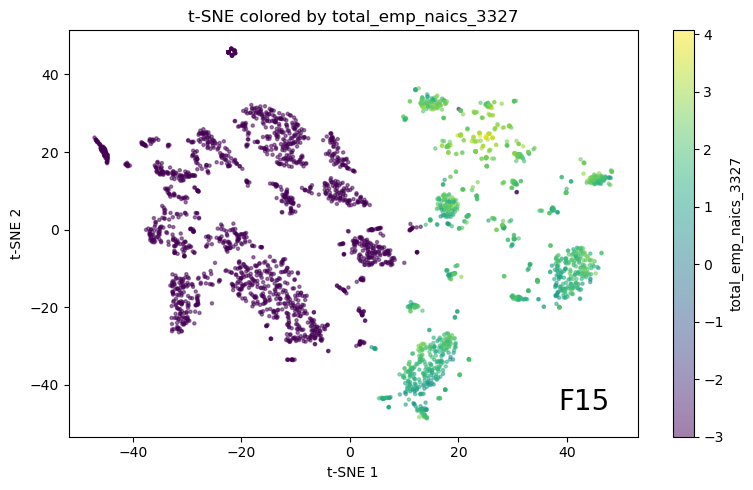

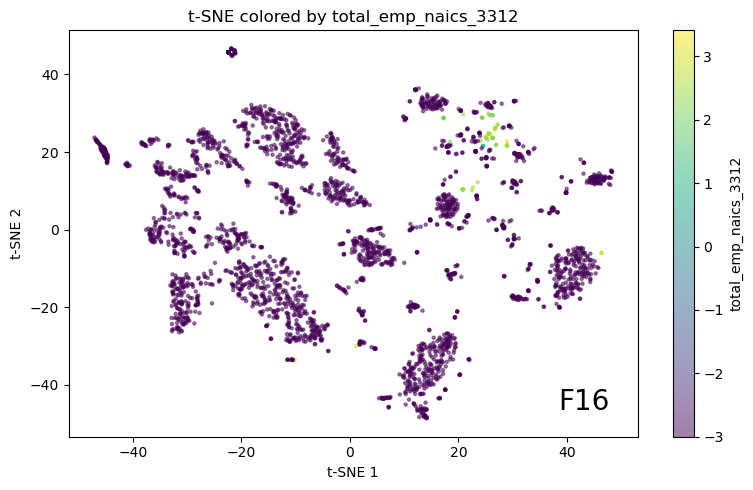

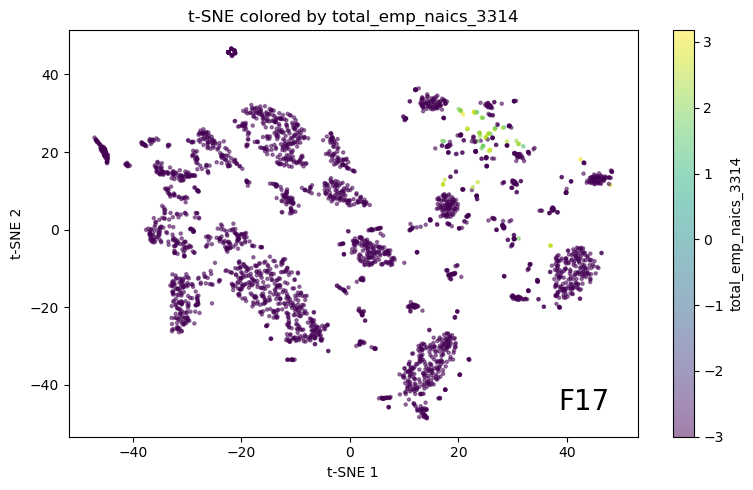

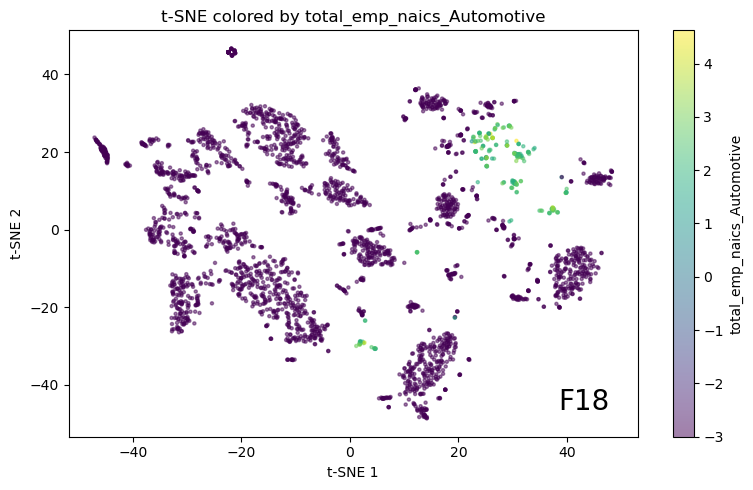

In [25]:
Vizualization.plot_tsne_feature_maps(
    X_tsne=X_tsne,
    df_features=df_scaled_features,
    feature_id_prefix="F",
    save_path=None  # Oder z. B. 'output/tsne_feature_plots'
)


/home/lbader/USA/GeoFiles/6_ESANN/notebooks/my_functions/functions_tsne_analysis.py:1387: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.1, 1, 1])


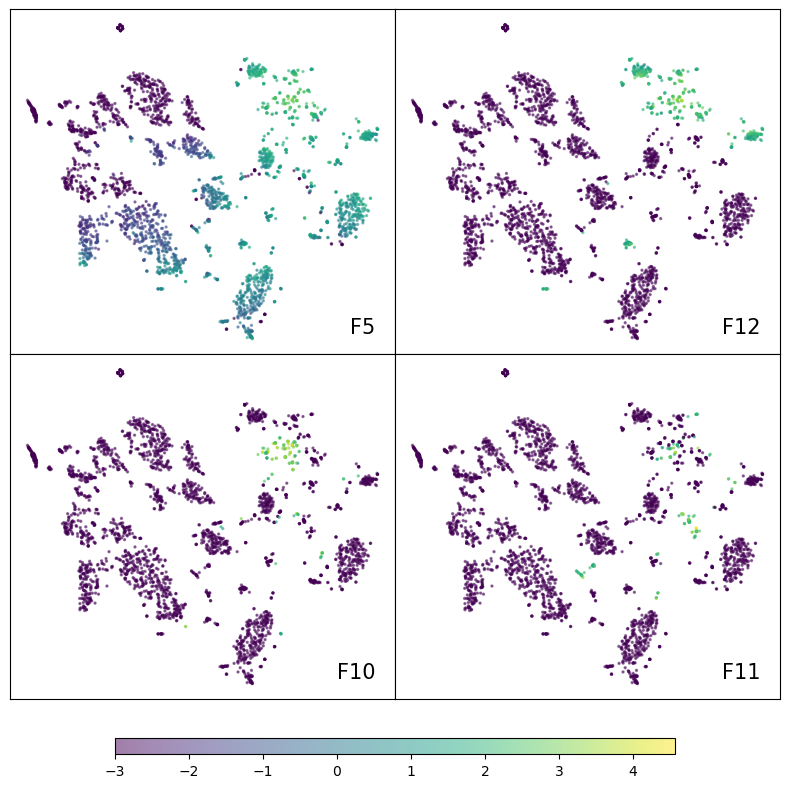

In [26]:
features_to_plot = [
    'total_emp_occu_51-4033',
    'total_emp_naics_3335',
    'total_emp_naics_3364',
    'total_emp_naics_3366'
]

Vizualization.plot_tsne_feature_grid(
    X_tsne=X_tsne,
    df_features=df_scaled_features,
    features_to_plot=features_to_plot,
    feature_id_dict=feature_id_dict,
    save_path='tsne_feature_values.png'
)


## Cluster on map

In [27]:
df_scaled_ranked, cluster_summary = Vizualization.compute_cluster_rankings(
    df_scaled=df_scaled,
    cluster_df=df_hdbscan_tsne,  # oder df_hdbscan_full
    cluster_col='cluster_id',
    color_col='color',
    exclude_columns=3  # z. B. 'cluster_id', 'color', 'rank'
)

# Ausgabe prüfen
display(cluster_summary.head())
display(df_scaled_ranked.head())


cluster_id  total_emp_occu_51-9022  total_emp_occu_51-4121  \
0          -1               -1.348299                0.844509   
1           0               -3.000000               -3.000000   
2           1               -0.681002                1.257337   
3           2               -0.345851                1.848357   
4           3                0.173426                2.119427   

   total_emp_occu_49-9041  total_emp_occu_49-9071  total_emp_occu_51-4033  \
0                0.644634                1.590747               -0.460854   
1               -3.000000               -3.000000               -3.000000   
2                1.358939                1.889055                0.258605   
3                1.801366                2.369751                0.705916   
4                2.035282                2.541459                1.311734   

   total_emp_occu_51-4035  total_emp_occu_47-2211  total_emp_occu_51-2041  \
0               -0.986621               -0.213416               -0.659812   
1               -3.000000               -3.000000               -3.000000   
2               -0.247830                0.726955               -0.116800   
3               -0.024411                1.356472                0.882561   
4                0.397395                1.572307                1.237357   

   total_emp_naics_3315  total_emp_naics_3364  total_emp_naics_3366  \
0             -2.838243             -2.819333             -2.893996   
1             -3.000000             -3.000000             -3.000000   
2             -2.952534             -2.946370             -2.904155   
3             -2.933551             -2.826760             -3.000000   
4             -2.571027             -2.815354             -2.629604   

   total_emp_naics_3335  total_emp_naics_3320A1  total_emp_naics_3320A2  \
0             -2.427643               -1.007872               -2.033370   
1             -3.000000               -3.000000               -3.000000   
2             -2.572896               -2.988370               -3.000000   
3             -3.000000               -3.000000                1.986742   
4              0.783734               -3.000000                2.182173   

   total_emp_naics_3327  total_emp_naics_3312  total_emp_naics_3314  \
0             -0.946413             -2.909482             -3.000000   
1             -3.000000             -3.000000             -3.000000   
2              1.607681             -3.000000             -3.000000   
3              1.716741             -2.956203             -2.935354   
4              1.981151             -2.947981             -2.888757   

   overall_mean  rank  
0     -1.262674    10  
1     -3.000000    22  
2     -1.018317     9  
3     -0.491425     7  
4     -0.030428     5

FIPS  total_emp_occu_51-9022  total_emp_occu_51-4121  \
0  39063                0.853660                2.049641   
1  51179               -0.153903                1.581953   
2  31181               -3.000000               -0.416108   
3  48127               -3.000000                1.356595   
4  19031               -1.198526                1.344777   

   total_emp_occu_49-9041  total_emp_occu_49-9071  total_emp_occu_51-4033  \
0                2.214662                2.782649                1.925375   
1                1.900014                2.624977               -0.664736   
2                0.247062                0.287497               -2.272024   
3                1.650494                1.374193               -2.045498   
4                1.349421                1.427407               -0.115336   

   total_emp_occu_51-4035  total_emp_occu_47-2211  total_emp_occu_51-2041  \
0                1.169405                1.153627                0.704402   
1               -0.416006                1.573891                0.415645   
2               -1.106276               -3.000000               -1.521709   
3               -3.000000               -1.458363               -1.060931   
4               -0.295574                0.768201                0.542615   

   total_emp_naics_3315  ...  total_emp_naics_3320A1  total_emp_naics_3320A2  \
0                  -3.0  ...                    -3.0                1.812913   
1                  -3.0  ...                    -3.0                1.079181   
2                  -3.0  ...                    -3.0               -3.000000   
3                  -3.0  ...                    -3.0               -3.000000   
4                  -3.0  ...                    -3.0                1.716003   

   total_emp_naics_3327  total_emp_naics_3312  total_emp_naics_3314  \
0              2.313867                  -3.0                  -3.0   
1             -3.000000                  -3.0                  -3.0   
2             -3.000000                  -3.0                  -3.0   
3             -3.000000                  -3.0                  -3.0   
4             -3.000000                  -3.0                  -3.0   

   total_emp_naics_Automotive  cluster_id    color  rank  overall_mean  
0                        -3.0           3  #ffbb78     5      0.109404  
1                        -3.0           5  #98df8a     8     -0.944646  
2                        -3.0          -1  #0000FF    10     -2.222445  
3                        -3.0           6  #d62728    15     -1.951971  
4                        -3.0           5  #98df8a     8     -1.085942  

[5 rows x 23 columns]

/home/lbader/USA/GeoFiles/6_ESANN/notebooks/my_functions/functions_tsne_analysis.py:1551: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


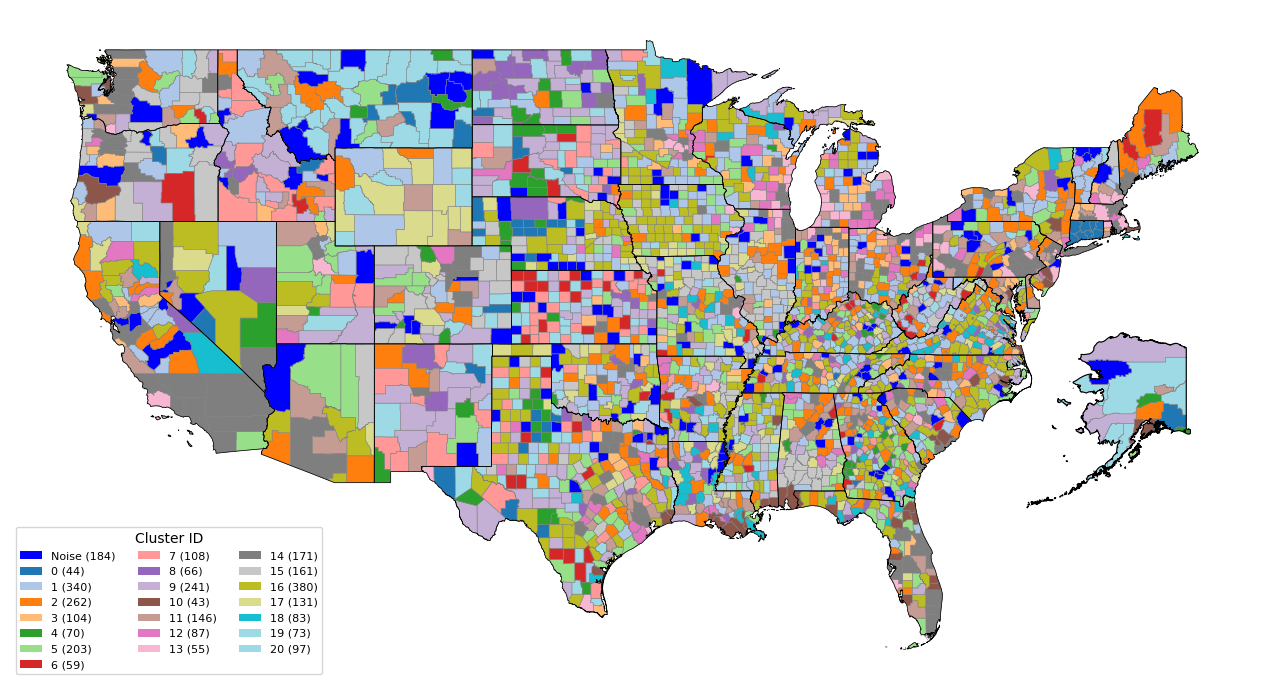

In [28]:
filtered_county_shape_north_america_merged, filtered_county_shape_alaska_merged = Vizualization.plot_clustered_us_counties(
    filtered_county_shape_north_america,
    filtered_county_shape_alaska,
    filtered_state_shape_north_america,
    df_scaled_ranked
)

/home/lbader/USA/GeoFiles/6_ESANN/notebooks/my_functions/functions_tsne_analysis.py:1691: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


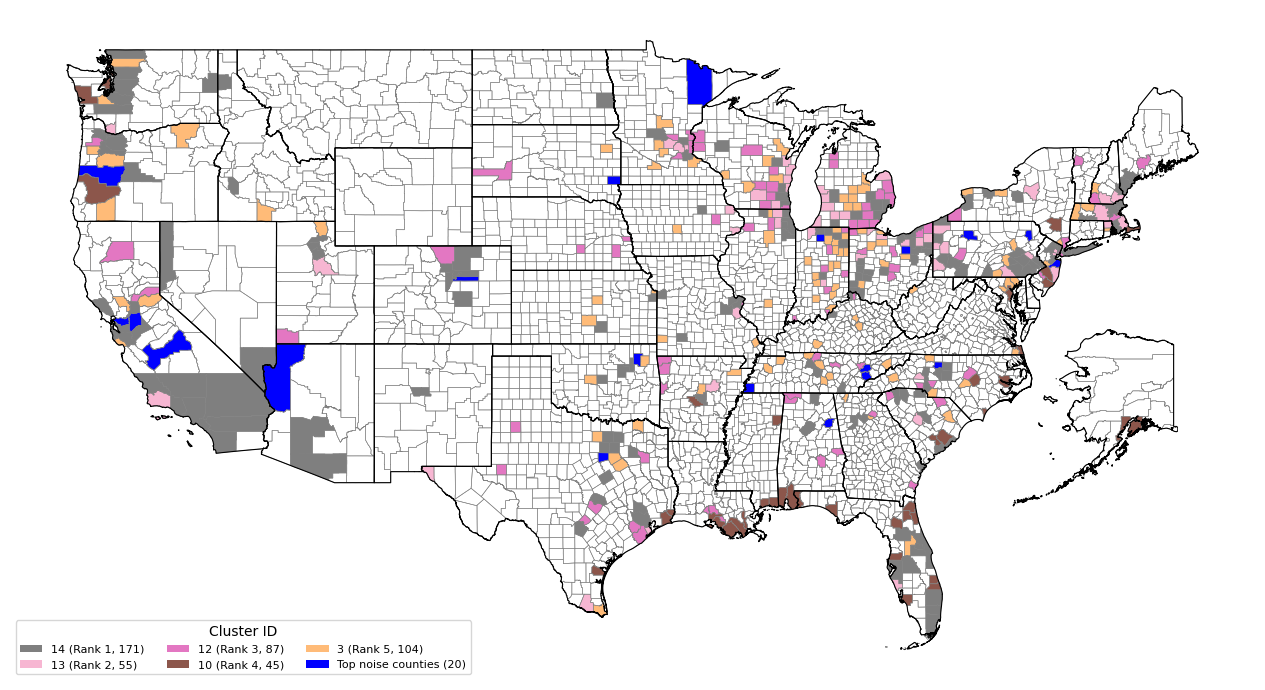

In [29]:
Vizualization.plot_top_ranked_and_noise_counties(
    filtered_county_shape_north_america_merged,
    filtered_state_shape_north_america
)


## Feature importance HDBSCAN (reduced space) 

In [30]:
Vizualization.plot_feature_importance_heatmap(
    df_scaled=df_scaled_ranked,
    df_original_features=df_original_features,
    output_file="feature_importance_heatmap.png"
)


NameError: name 'RandomForestClassifier' is not defined

## Cluster feature values bar plot

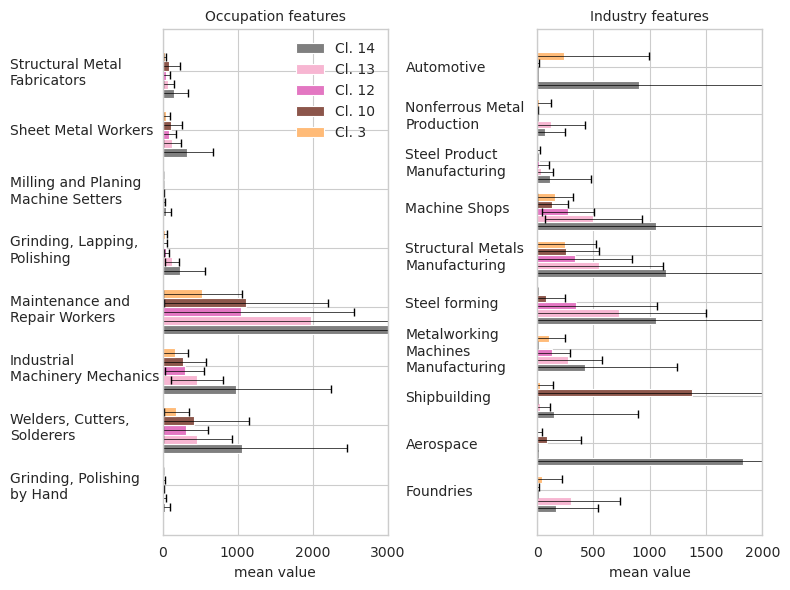

In [31]:
Vizualization.plot_cluster_feature_bars(
    df_original=df_original,
    df_scaled=df_scaled_ranked,
    selected_clusters=[14, 13, 12, 10, 3],
    occupations={
        "51-9022": "Grinding, Polishing by Hand",
        "51-4121": "Welders, Cutters, Solderers",
        "49-9041": "Industrial Machinery Mechanics",
        "49-9071": "Maintenance and Repair Workers",
        "51-4033": "Grinding, Lapping, Polishing",
        "51-4035": "Milling and Planing Machine Setters",
        "47-2211": "Sheet Metal Workers",
        "51-2041": "Structural Metal Fabricators"
    },
    naics={
        "3315": "Foundries",
        "Automotive": "Automotive",
        "3364": "Aerospace",
        "3366": "Shipbuilding",
        "3335": "Metalworking Machines Manufacturing",
        "3320A1": "Steel forming",
        "3320A2": "Structural Metals Manufacturing",
        "3327": "Machine Shops",
        "3312": "Steel Product Manufacturing",
        "3314": "Nonferrous Metal Production"
    }
)
